In [3]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
#import contractions
import re
import random

pd.options.display.float_format = '{:,.2f}'.format

In [4]:
df = pd.read_csv('tweet_sentiment_analysis.csv')
df.rename(columns={'date': 'Date'}, inplace=True)
df.set_index("Date", inplace=True)
df

,Unnamed: 0,text,cleantext,Sentimento
Date,,,,
2021-02-10,0,Blue Ridge Bank shares halted by NYSE after #b...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",0.00
2021-02-10,1,"😎 Today, that's this #Thursday, we will do a ""...","['today', 'take', 'friend', 'expe']",0.00
2021-02-10,2,"Guys evening, I have read this article about B...","['guys', 'evening', 'read', 'article', 'btc', ...",0.00
2021-02-10,3,$BTC A big chance in a billion! Price: \487264...,"['btc', 'big', 'chance', 'billion', 'price']",0.00
2021-02-10,4,This network is secured by 9 508 nodes as of t...,"['network', 'secured', 'nodes', 'today', 'soon...",0.00
...,...,...,...,...
2021-11-05,1905880,@shibarium_ BTC is the cutest thing in the wor...,"['btc', 'cutest', 'thing', 'world', 'many', 'c...",0.00
2021-11-05,1905881,@TechDev_52 @JohalMiles Will give him a follow...,"['give', 'follow']",0.00
2021-11-05,1905882,@CryptoSagaing I have been buying cryptocurren...,"['buying', 'cryptocurrencies', 'since', 'last'...",0.00


In [5]:
category = ['Negativo','Neutro','Positivo']
df['Sentimento'] = pd.cut(df['Sentimento'], bins=[-1,-0.05,0.05,1], labels=category)
df['Sentimento_orig'] = df['Sentimento']
df = pd.get_dummies(df,columns=['Sentimento'])
df

,Unnamed: 0,text,cleantext,Sentimento_orig,Sentimento_Negativo,Sentimento_Neutro,Sentimento_Positivo
Date,,,,,,,
2021-02-10,0,Blue Ridge Bank shares halted by NYSE after #b...,"['blue', 'ridge', 'bank', 'shares', 'halted', ...",Neutro,0,1,0
2021-02-10,1,"😎 Today, that's this #Thursday, we will do a ""...","['today', 'take', 'friend', 'expe']",Neutro,0,1,0
2021-02-10,2,"Guys evening, I have read this article about B...","['guys', 'evening', 'read', 'article', 'btc', ...",Neutro,0,1,0
2021-02-10,3,$BTC A big chance in a billion! Price: \487264...,"['btc', 'big', 'chance', 'billion', 'price']",Neutro,0,1,0
2021-02-10,4,This network is secured by 9 508 nodes as of t...,"['network', 'secured', 'nodes', 'today', 'soon...",Neutro,0,1,0
...,...,...,...,...,...,...,...
2021-11-05,1905880,@shibarium_ BTC is the cutest thing in the wor...,"['btc', 'cutest', 'thing', 'world', 'many', 'c...",Neutro,0,1,0
2021-11-05,1905881,@TechDev_52 @JohalMiles Will give him a follow...,"['give', 'follow']",Neutro,0,1,0
2021-11-05,1905882,@CryptoSagaing I have been buying cryptocurren...,"['buying', 'cryptocurrencies', 'since', 'last'...",Neutro,0,1,0


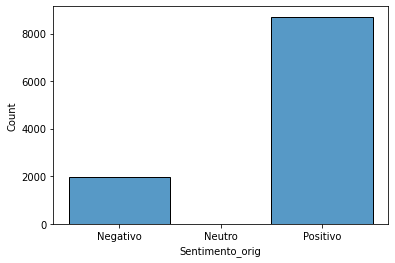

In [6]:
sns.histplot(data = df[df["Sentimento_orig"]!="Neutro"]["Sentimento_orig"]);

In [7]:
btcPrice = pd.read_csv('BTC-USD.csv')
btcPrice

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-11,"38,346.53","38,346.53","30,549.60","35,566.66","35,566.66",123320567399
1,2021-01-12,"35,516.36","36,568.53","32,697.98","33,922.96","33,922.96",74773277909
2,2021-01-13,"33,915.12","37,599.96","32,584.67","37,316.36","37,316.36",69364315979
3,2021-01-14,"37,325.11","39,966.41","36,868.56","39,187.33","39,187.33",63615990033
4,2021-01-15,"39,156.71","39,577.71","34,659.59","36,825.37","36,825.37",67760757881
...,...,...,...,...,...,...,...
300,2021-11-07,"61,554.92","63,326.99","61,432.49","63,326.99","63,326.99",24726754302
301,2021-11-08,"63,344.07","67,673.74","63,344.07","67,566.83","67,566.83",41125608330
302,2021-11-09,"67,549.73","68,530.34","66,382.06","66,971.83","66,971.83",42357991721
303,2021-11-10,"66,953.34","68,789.62","63,208.11","64,995.23","64,995.23",48730828378


In [8]:
btcPrice['variacao'] = (btcPrice['Close'] - btcPrice['Open'])*100/btcPrice['Open']
btcPrice

,Date,Open,High,Low,Close,Adj Close,Volume,variacao
0,2021-01-11,"38,346.53","38,346.53","30,549.60","35,566.66","35,566.66",123320567399,-7.25
1,2021-01-12,"35,516.36","36,568.53","32,697.98","33,922.96","33,922.96",74773277909,-4.49
2,2021-01-13,"33,915.12","37,599.96","32,584.67","37,316.36","37,316.36",69364315979,10.03
3,2021-01-14,"37,325.11","39,966.41","36,868.56","39,187.33","39,187.33",63615990033,4.99
4,2021-01-15,"39,156.71","39,577.71","34,659.59","36,825.37","36,825.37",67760757881,-5.95
...,...,...,...,...,...,...,...,...
300,2021-11-07,"61,554.92","63,326.99","61,432.49","63,326.99","63,326.99",24726754302,2.88
301,2021-11-08,"63,344.07","67,673.74","63,344.07","67,566.83","67,566.83",41125608330,6.67
302,2021-11-09,"67,549.73","68,530.34","66,382.06","66,971.83","66,971.83",42357991721,-0.86
303,2021-11-10,"66,953.34","68,789.62","63,208.11","64,995.23","64,995.23",48730828378,-2.92


In [9]:
dfResumo = pd.DataFrame()

In [10]:
dfResumo["Date"] = btcPrice['Date']
btcPrice.set_index("Date", inplace=True)
dfResumo.set_index("Date", inplace=True)
dfResumo["Variação"] = btcPrice['variacao']
dfResumo["Close"] = btcPrice['Close']
dfResumo["Open"] = btcPrice['Open']
dfResumo["Volume"] = btcPrice['Volume']
dfResumo

,Variação,Close,Open,Volume
Date,,,,
2021-01-11,-7.25,"35,566.66","38,346.53",123320567399
2021-01-12,-4.49,"33,922.96","35,516.36",74773277909
2021-01-13,10.03,"37,316.36","33,915.12",69364315979
2021-01-14,4.99,"39,187.33","37,325.11",63615990033
2021-01-15,-5.95,"36,825.37","39,156.71",67760757881
...,...,...,...,...
2021-11-07,2.88,"63,326.99","61,554.92",24726754302
2021-11-08,6.67,"67,566.83","63,344.07",41125608330
2021-11-09,-0.86,"66,971.83","67,549.73",42357991721


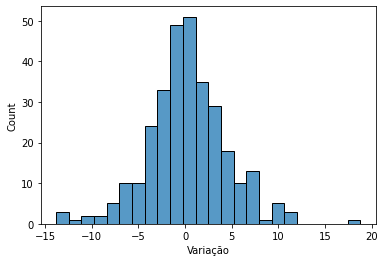

In [11]:
sns.histplot(data = dfResumo["Variação"]);

In [12]:
dfResumo = dfResumo.join(df.groupby(df.index).sum())
dfResumo

,Variação,Close,Open,Volume,Unnamed: 0,Sentimento_Negativo,Sentimento_Neutro,Sentimento_Positivo
Date,,,,,,,,
2021-01-11,-7.25,"35,566.66","38,346.53",123320567399,NaN,NaN,NaN,NaN
2021-01-12,-4.49,"33,922.96","35,516.36",74773277909,NaN,NaN,NaN,NaN
2021-01-13,10.03,"37,316.36","33,915.12",69364315979,NaN,NaN,NaN,NaN
2021-01-14,4.99,"39,187.33","37,325.11",63615990033,NaN,NaN,NaN,NaN
2021-01-15,-5.95,"36,825.37","39,156.71",67760757881,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-11-07,2.88,"63,326.99","61,554.92",24726754302,NaN,NaN,NaN,NaN
2021-11-08,6.67,"67,566.83","63,344.07",41125608330,NaN,NaN,NaN,NaN
2021-11-09,-0.86,"66,971.83","67,549.73",42357991721,NaN,NaN,NaN,NaN


In [13]:
del dfResumo["Unnamed: 0"]

In [14]:
dfResumo = dfResumo.fillna(0)
dfResumo = dfResumo[(dfResumo['Sentimento_Negativo']!=0) & (dfResumo['Sentimento_Neutro']!=0) & (dfResumo['Sentimento_Positivo']!=0)]
dfResumo

,Variação,Close,Open,Volume,Sentimento_Negativo,Sentimento_Neutro,Sentimento_Positivo
Date,,,,,,,
2021-02-05,3.28,"38,144.31","36,931.55",58598066402,2.00,"1,681.00",11.00
2021-02-06,2.96,"39,266.01","38,138.39",71326033653,2.00,"3,263.00",13.00
2021-02-08,18.80,"46,196.46","38,886.83",101467222687,3.00,"5,531.00",113.00
2021-02-09,0.64,"46,481.11","46,184.99",91809846886,6.00,"4,328.00",16.00
2021-02-10,-3.34,"44,918.18","46,469.76",87301089896,4.00,"3,513.00",9.00
...,...,...,...,...,...,...,...
2021-10-28,3.68,"60,622.14","58,470.73",45257083247,59.00,"55,575.00",191.00
2021-10-29,2.64,"62,227.96","60,624.87",36856881767,31.00,"35,643.00",133.00
2021-11-04,-2.37,"61,452.23","62,941.80",32615846901,27.00,"26,132.00",162.00


In [15]:
dfResumo_norm = pd.DataFrame()
for i in dfResumo:
    dfResumo_norm[i] = (dfResumo[i] -  dfResumo[i].min())/( dfResumo[i].max() - dfResumo[i].min())

<AxesSubplot:>

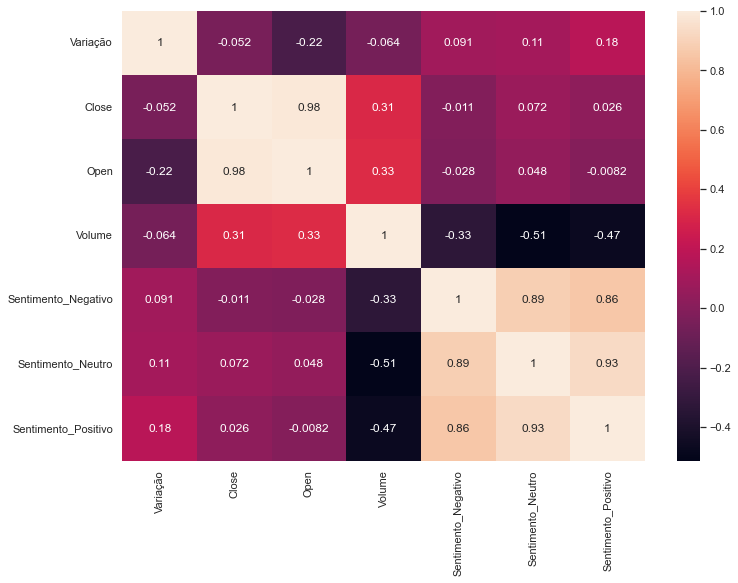

In [16]:
corr = dfResumo_norm .corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True)

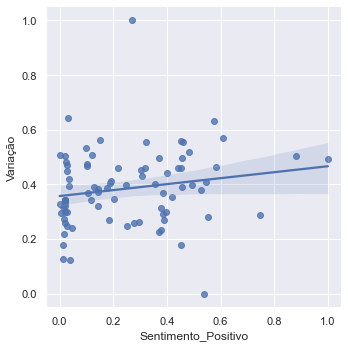

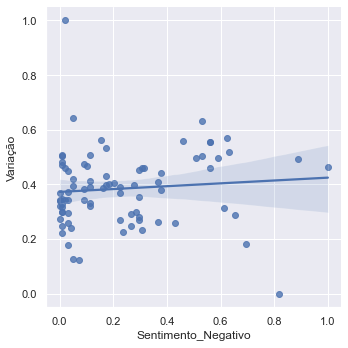

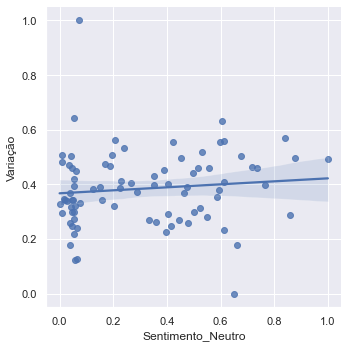

In [17]:
g = sns.lmplot(
    data=dfResumo_norm,
    x="Sentimento_Positivo", y="Variação",
    height=5
)
g = sns.lmplot(
    data=dfResumo_norm,
    x="Sentimento_Negativo", y="Variação",
    height=5
)
g = sns.lmplot(
    data=dfResumo_norm,
    x="Sentimento_Neutro", y="Variação",
    height=5
)

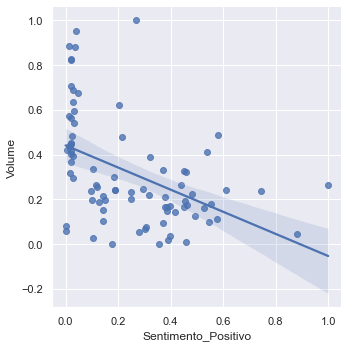

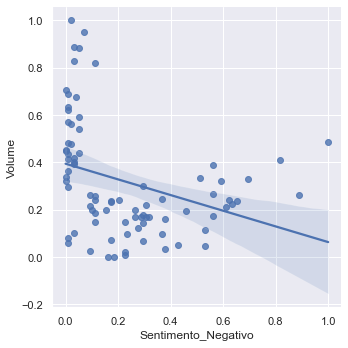

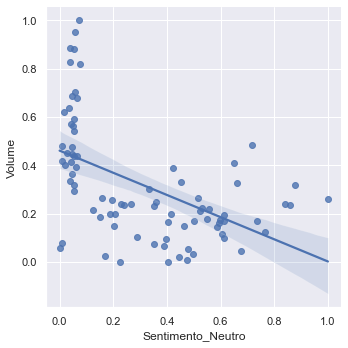

In [18]:
g = sns.lmplot(
    data=dfResumo_norm,
    x="Sentimento_Positivo", y="Volume",
    height=5
)
g = sns.lmplot(
    data=dfResumo_norm,
    x="Sentimento_Negativo", y="Volume",
    height=5
)
g = sns.lmplot(
    data=dfResumo_norm,
    x="Sentimento_Neutro", y="Volume",
    height=5
)

O que é este P-value? O valor P é o valor da probabilidade de que a correlação entre essas duas variáveis ​​seja estatisticamente significativa. Normalmente, escolhemos um nível de significância de 0,05, o que significa que temos 95% de confiança de que a correlação entre as variáveis ​​é significativa.

Por convenção, quando o

o valor de p é $ <$ 0,001: dizemos que há fortes evidências de que a correlação é significativa.
o valor p é $ <$ 0,05: há evidências moderadas de que a correlação é significativa.
o valor p é $ <$ 0,1: há evidências fracas de que a correlação é significativa.
o valor p é $> $ 0,1: não há evidências de que a correlação seja significativa.

In [19]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(dfResumo_norm['Sentimento_Positivo'], dfResumo_norm['Volume'])
print("Positivo - Volume: The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(dfResumo_norm['Sentimento_Negativo'], dfResumo_norm['Volume'])
print("Negativo - Volume:The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(dfResumo_norm['Sentimento_Neutro'], dfResumo_norm['Volume'])
print("Neutro - Volume:The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

Positivo - Volume: The Pearson Correlation Coefficient is -0.46573444531486785  with a P-value of P = 9.12872556906647e-06
Negativo - Volume:The Pearson Correlation Coefficient is -0.3320810550309029  with a P-value of P = 0.0021617563248496306
Neutro - Volume:The Pearson Correlation Coefficient is -0.5129422820161039  with a P-value of P = 7.12019812358288e-07


In [20]:
pearson_coef, p_value = stats.pearsonr(dfResumo_norm['Sentimento_Positivo'], dfResumo_norm['Variação'])
print("Psotivo - Variação: The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(dfResumo_norm['Sentimento_Negativo'], dfResumo_norm['Variação'])
print("Negativo - Variação: The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  
pearson_coef, p_value = stats.pearsonr(dfResumo_norm['Sentimento_Neutro'], dfResumo_norm['Variação'])
print("Neutro - Variação: The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

Psotivo - Variação: The Pearson Correlation Coefficient is 0.17795370273240807  with a P-value of P = 0.10750195498799353
Negativo - Variação: The Pearson Correlation Coefficient is 0.09059835027948719  with a P-value of P = 0.41533011460503033
Neutro - Variação: The Pearson Correlation Coefficient is 0.10594664330927765  with a P-value of P = 0.3404542694831423


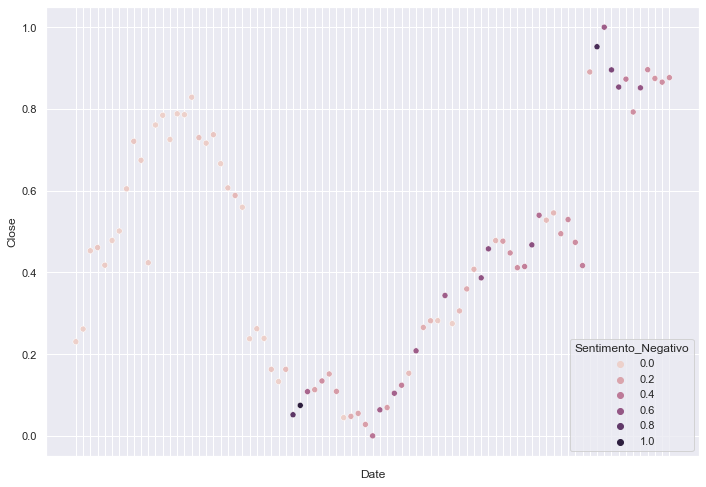

In [21]:
ax = sns.scatterplot(x=dfResumo_norm.index, y=dfResumo_norm["Close"], hue = dfResumo_norm['Sentimento_Negativo'])
ax.set(xticklabels=[])

plt.show()

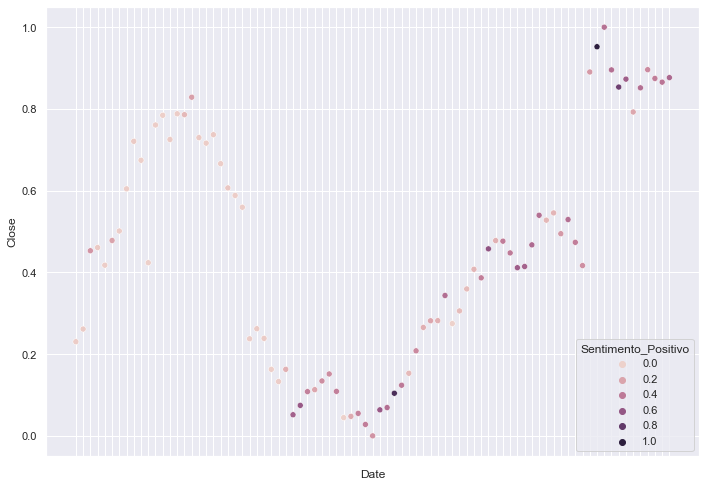

In [22]:
ax = sns.scatterplot(x=dfResumo_norm.index, y=dfResumo_norm["Close"], hue = dfResumo_norm['Sentimento_Positivo'])
ax.set(xticklabels=[])

plt.show()

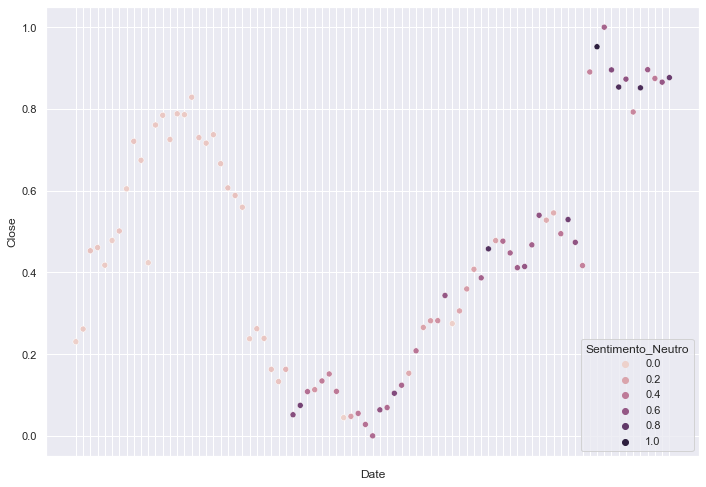

In [23]:
ax = sns.scatterplot(x=dfResumo_norm.index, y=dfResumo_norm["Close"], hue = dfResumo_norm['Sentimento_Neutro'])
ax.set(xticklabels=[])

plt.show()

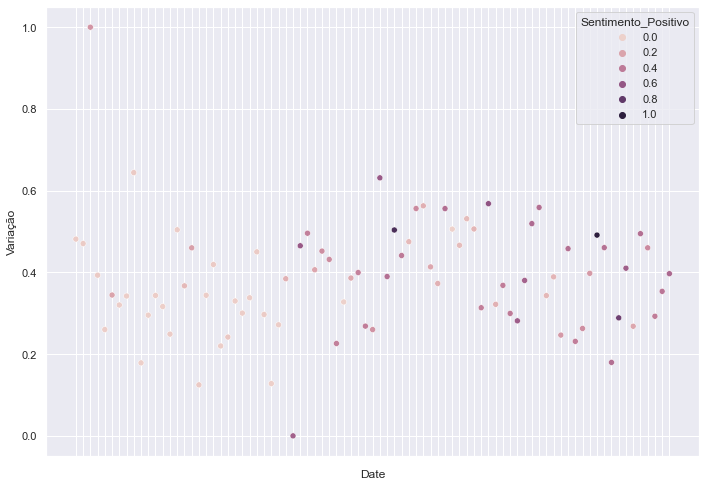

In [24]:
ax = sns.scatterplot(x=dfResumo_norm.index, y=dfResumo_norm["Variação"], hue = dfResumo_norm['Sentimento_Positivo'])
ax.set(xticklabels=[])

plt.show()

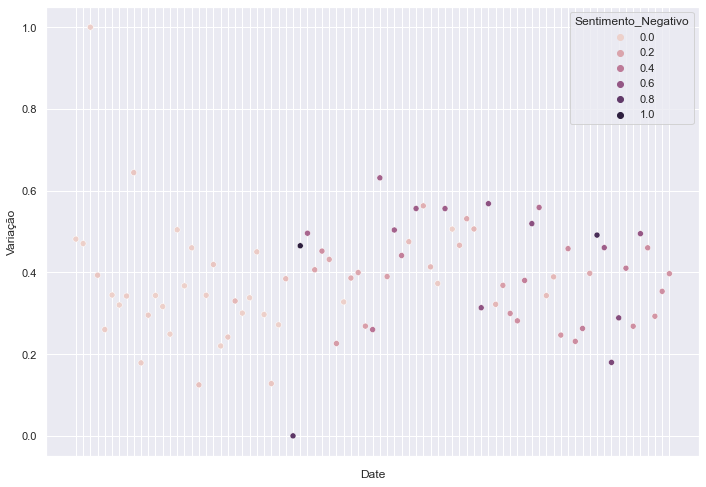

In [25]:
ax = sns.scatterplot(x=dfResumo_norm.index, y=dfResumo_norm["Variação"], hue = dfResumo_norm['Sentimento_Negativo'])
ax.set(xticklabels=[])

plt.show()

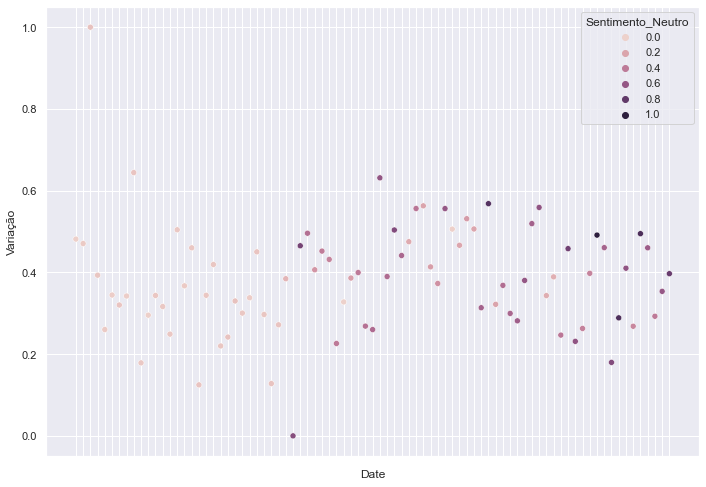

In [26]:
ax = sns.scatterplot(x=dfResumo_norm.index, y=dfResumo_norm["Variação"], hue = dfResumo_norm['Sentimento_Neutro'])
ax.set(xticklabels=[])

plt.show()